<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [3]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

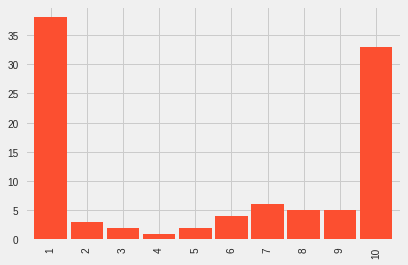

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

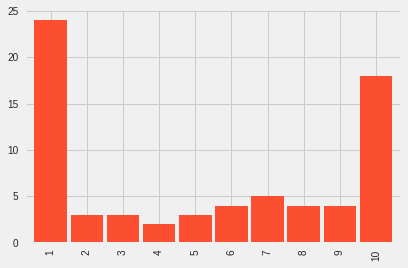

In [2]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

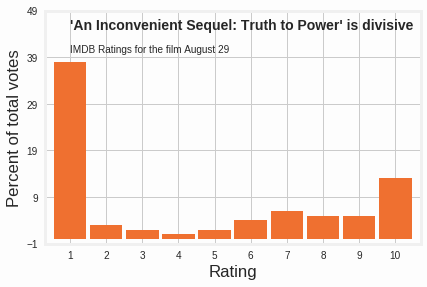

In [33]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38,3,2,1,2,4,6,5,5,13],
                index=range(1,11))
fig = plt.figure()
ax = fake.plot.bar(color='#ef7030', width=.9)

ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(-1,50,10))


fig.patch.set_facecolor('#fdfdfd')


ax.text(x=0, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold');

ax.text(x=0, y=40, s="IMDB Ratings for the film August 29",
       fontsize=10);

ax.set_facecolor('#fdfdfd')

ax.tick_params(labelrotation=0)

In [11]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [28]:
df.sample(1).T

,47046
timestamp,2017-08-17 21:40:09.368806
respondents,39
category,Top 1000 voters
link,http://www.imdb.com/title/tt6322922/ratings-to...
average,4.6
mean,4.7
median,5
1_votes,10
2_votes,4
3_votes,2


In [29]:
lastday[lastday['category'] == 'IMDb users'].respondents.plot()

NameError: ignored

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df = df.set_index('timestamp')

In [32]:
df['category'].value_counts()

Females Aged 45+      4216
US users              4216
Aged 30-44            4216
Males                 4216
Aged 45+              4216
Males under 18        4216
IMDb users            4216
Females               4216
Aged under 18         4216
Males Aged 18-29      4216
Aged 18-29            4216
Females Aged 18-29    4216
Males Aged 30-44      4216
Non-US users          4216
Top 1000 voters       4216
Males Aged 45+        4216
Females Aged 30-44    4216
IMDb staff            4216
Females under 18      4165
Name: category, dtype: int64

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [2]:
!npm install -g idyll

npm WARN notice [SECURITY] static-eval has the following vulnerability: 1 moderate. Go here for more details: https://nodesecurity.io/advisories?search=static-eval&version=2.0.2 - Run `npm i npm@latest -g` to upgrade your npm version, and then `npm audit` to get more info.
/tools/node/bin/idyll -> /tools/node/lib/node_modules/idyll/bin/idyll.js
npm WARN acorn-dynamic-import@4.0.0 requires a peer of acorn@^6.0.0 but none is installed. You must install peer dependencies yourself.
npm WARN optional SKIPPING OPTIONAL DEPENDENCY: fsevents@1.2.7 (node_modules/idyll/node_modules/fsevents):
npm WARN notsup SKIPPING OPTIONAL DEPENDENCY: Unsupported platform for fsevents@1.2.7: wanted {"os":"darwin","arch":"any"} (current: {"os":"linux","arch":"x64"})

+ idyll@4.0.6-alpha.0
added 947 packages from 843 contributors in 43.903s


   ╭─────────────────────────────────────╮
   │                                     │
   │   Update available 5.7.1 → 6.9.0    │
   │     Run npm i -g npm to update      │

In [8]:
!idyll create


? In which directory would you like to install your post? (my-idyll-post) ? In which directory would you like to install your post? (my-idyll-post) .? In which directory would you like to install your post? (my-idyll-post) ./? In which directory would you like to install your post? (my-idyll-post) ./P? In which directory would you like to install your post? (my-idyll-post) ./PO? In which directory would you like to install your post? (my-idyll-post) ./POS? In which directory would you like to install your post? (my-idyll-post) ./POST
? In which directory would you like to install your post? (my-idyll-post) ./POST
1? In which directory would you like to install your post? ./POST1
? What would you like to name your post? (./POST1) ? What would you like to name your post? (./POST1) p? What would you like to name your post? (./POST1) po? What would you like to name your post? (./POST1) pos? What would you like to name your post? (./POST1) post? What would you like to name your post? (./PO

In [6]:
!ls ./


sample_data


In [9]:
!cd POST1
!idyll

Usage: idyll <command> [options]

Commands:
  build               Turn index.idyll into standalone output
  create [post-name]  Create a new post
  publish             Publish your project to idyll.pub
  watch               Build then start the development server

Options:
  --help     Show help                                                 [boolean]
  --version  Show version number                                       [boolean]

Not enough non-option arguments: got 0, need at least 1


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2019/03/paine.womens-bball-programs.03tk-2.png?w=575'
example = Image(url=url, width=400)

display(example)

In [0]:
bsktball_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/ncaa-womens-basketball-tournament/ncaa-womens-basketball-tournament-history.csv'

In [12]:
bskt = pd.read_csv(bsktball_url)
bskt.shape

(2092, 19)

In [13]:
bskt.head()

,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %
0,1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80


In [0]:
seed_pts_dict = {'1': 100, '2': 70, '3':55, '4':44, '5':36, '6':30, '7':25, '8':21, '9':17, '10':14, '11':11, '12':8, '13':5, '14':3, '15':1, '16':0, "(OR)":0}

In [0]:
bskt['seed points'] = bskt['Seed'].replace(seed_pts_dict)

In [44]:
bskt.head()

,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %,seed points
0,1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4,44
1,1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8,25
2,1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3,70
3,1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5,36
4,1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80,44


In [45]:
bskt['seed points'].value_counts()

55     149
25     149
100    149
36     149
44     148
70     147
30     147
21     141
14     132
17     131
8      123
11     120
0      109
1      100
5       99
3       99
Name: seed points, dtype: int64

In [58]:
llso_bskt = bskt.loc[(bskt['School'] == 'Louisiana Tech') |
        (bskt['School'] == 'Long Beach St.') |
        (bskt['School'] == 'Southern California') | 
        (bskt['School'] == 'Old Dominion')]
llso_bskt.sample(10)

,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %,seed points
107,1985,Long Beach St.,1,Western Collegiate,13,1,92.9,1st,26,2,92.9,auto,Y,2,1,RF,28,3,90.3,100
1603,2011,Louisiana Tech,10,Western Athletic,15,1,93.8,1st,24,7,77.4,at-large,N,0,1,1st,24,8,75,14
1092,2003,Louisiana Tech,5,Western Athletic,18,0,100,1st,29,2,93.5,auto,Y,2,1,RSF,31,3,91.2,36
120,1985,Southern California,4,Western Collegiate,10,4,71.4,T2nd,19,8,70.4,at-large,Y,1,1,RSF,20,9,69,44
13,1982,Long Beach St.,1,Western Collegiate,-,-,-,-,22,5,81.5,auto,Y,1,1,RSF,23,6,79.3,100
588,1995,Old Dominion,8,Colonial,13,1,92.9,T1st,27,5,84.4,auto,N,0,1,1st,27,6,81.8,21
459,1993,Louisiana Tech,6,Sun Belt,13,1,92.9,T1st,23,5,82.1,at-large,Y,3,1,RF,26,6,81.3,30
47,1983,Louisiana Tech,1,Independent,-,-,-,-,27,1,96.4,at-large,Y,4,1,N2nd,31,2,93.9,100
226,1988,Louisiana Tech,2,American South,9,0,100,1st,27,2,93.1,at-large,Y,5,0,Champ,32,2,94.1,70
772,1998,Louisiana Tech,3,Sun Belt,13,1,92.9,1st,26,3,89.7,auto,Y,5,1,N2nd,31,4,88.6,55


In [0]:
bskt_ct = pd.crosstab(index=llso_bskt['Year'], columns=llso_bskt['School'], aggfunc=np.mean, values=llso_bskt['seed points'])

In [0]:
bskt_ct = bskt_ct.fillna(0)

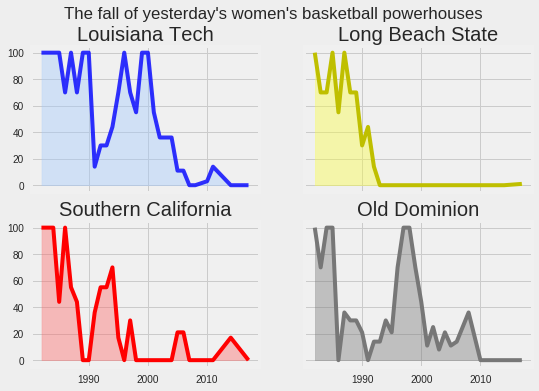

In [122]:

plt.style.use('fivethirtyeight')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle("The fall of yesterday's women's basketball powerhouses")

f.patch.set_facecolor('#eeeeee')

x = bskt_ct.index.values
y1 = bskt_ct['Louisiana Tech']
y2 = bskt_ct['Long Beach St.']
y3 =  bskt_ct['Southern California']
y4 = bskt_ct['Old Dominion']

ax1.plot(x, y1, c='b', alpha=.8)
ax2.plot(x, y2, c='y')
ax3.plot(x, y3, c='r')
ax4.plot(x, y4, c='#777777')

ax1.set_title('Louisiana Tech')
ax2.set_title('Long Beach State')
ax3.set_title('Southern California')
ax4.set_title('Old Dominion');

ax1.fill_between(x,y1, color="#a1c9ff", alpha=.4)
ax2.fill_between(x,y2, color="#fbff3f", alpha=.4)
ax3.fill_between(x,y3, color="#ff6666", alpha=.4)
ax4.fill_between(x,y4, color="#777777", alpha=.4)





In [21]:
display(example)